IndexError: index 0 is out of bounds for axis 0 with size 0

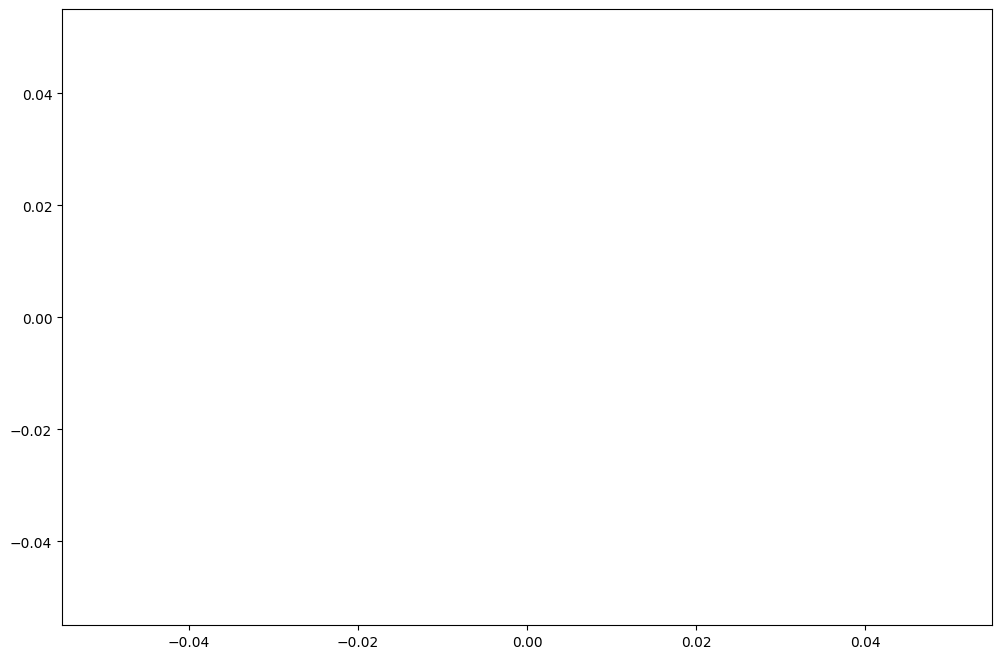

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\Users\bogdan\Desktop\Uni\NLP\src\results.tsv'

data = pd.read_csv(file_path, sep='\t')

# Filter the baseline data from the same file
baseline_data = data[data['train_lang'] == 'baseline'].copy()
baseline_data['synopsis_number'] = 0

def plot_span_f1_for_language(train_language, data):
    filtered_data = data[data['train_lang'] == train_language].copy()

    filtered_data.loc[:, 'synopsis_number'] = filtered_data['num_train_files'].apply(
        lambda x: int(x.split('_')[1].split('.')[0]) if pd.notnull(x) else 0
    )
    sorted_data = filtered_data.sort_values(by='synopsis_number')

    plt.figure(figsize=(12, 8))
    max_synopsis = sorted_data['synopsis_number'].max()

    for lang in ['german', 'french', 'english']:
        subset = sorted_data[sorted_data['test_lang'] == lang]
        plt.plot(subset['synopsis_number'], subset['span_f1'], marker='o', label=f'Test on {lang.capitalize()}')

        baseline_value = baseline_data[(baseline_data['test_lang'] == lang)]['span_f1'].values[0]
        plt.hlines(baseline_value, 1, max_synopsis, colors='gray', linestyles='dashed', label=f'Baseline {lang.capitalize()}')

    plt.xlabel('Synopsis Number (Increasing Size of Training Data)')
    plt.ylabel('Span F1 Score')
    plt.title(f'Evolution of Span F1 Score for {train_language} Trained Model')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1, max_synopsis + 1))
    plt.show()

for language in ['French', 'English', 'German']:
    plot_span_f1_for_language(language, data)

In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the data
file_path = r'C:\Users\bogdan\Desktop\Uni\NLP\src\results.tsv'

data = pd.read_csv(file_path, sep='\t')

# Filter the baseline data
baseline_data = data[data['train_lang'] == 'baseline']

# Create a line plot
fig = px.line(data, x='num_train_files', y='span_f1', color='test_lang', line_group='train_lang', labels={'span_f1':'Span F1 Score', 'num_train_files':'Number of Training Files'}, title='Span F1 Score for Different Training Languages')

# Add the baseline models to the plot
for lang in baseline_data['test_lang'].unique():
    baseline_value = baseline_data[baseline_data['test_lang'] == lang]['span_f1'].values[0]
    fig.add_trace(go.Scatter(x=data['num_train_files'].unique(), y=[baseline_value]*len(data['num_train_files'].unique()), mode='lines', name=f'Baseline {lang}'))

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed